In [2]:
%matplotlib qt

In [1]:
import pandas as pd
import numpy as np

import mne
import matplotlib.pyplot as plt
from mne.datasets import sample
import mne_bids
from mne_bids import print_dir_tree, read_raw_bids, make_report, find_matching_paths, BIDSPath
import os
import os.path as op
from pathlib import Path
from tqdm import tqdm
import time


# # Enable GPU Acceleration with CUDA for MNE

# mne.utils.set_config('MNE_USE_CUDA', 'true')
# mne.cuda.init_cuda(verbose=True)
print("MNE-BIDS Version:", mne_bids.__version__)

MNE-BIDS Version: 0.12


In [2]:
patients = pd.read_csv('./ds004504/participants.tsv', sep='\t')

patients.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


In [7]:
def get_bids_path(dataset: str, sub: str) -> BIDSPath:
    bids_path = BIDSPath(
        subject=sub,
        task='eyesclosed',
        suffix='eeg',
        extension = '.set',
        datatype='eeg',
        root = f'./{dataset}'
    )

    return bids_path

In [8]:
print(f"Found {patients.shape[0]} patients...")
raws = []

for sub in tqdm(patients['participant_id']):
    bids_path = get_bids_path("ds004504", sub.replace("sub-", ""))
    raw = read_raw_bids(bids_path=bids_path, verbose=False)
    raws.append(raw)
    print(f"Read sub-{sub} raw EEG info")

Found 88 patients...


  0%|          | 0/88 [00:00<?, ?it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "ds004504\sub-001\**\eeg\sub-001*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
  1%|          | 1/88 [00:00<01:12,  1.20it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-002_

Read sub-sub-001 raw EEG info
Read sub-sub-002 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-003_task-eyesclosed.

The search_str was "ds004504\sub-003\**\eeg\sub-003*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-004_task-eyesclosed.

The search_str was "ds004504\sub-004\**\eeg\sub-004*events.tsv"
  

Read sub-sub-003 raw EEG info
Read sub-sub-004 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-005_task-eyesclosed.

The search_str was "ds004504\sub-005\**\eeg\sub-005*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
  6%|▌         | 5/88 [00:01<00:19,  4.25it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-006_task-eyesclosed.

The search_str was "

Read sub-sub-005 raw EEG info
Read sub-sub-006 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-007_task-eyesclosed.

The search_str was "ds004504\sub-007\**\eeg\sub-007*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
  8%|▊         | 7/88 [00:01<00:17,  4.54it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-008_task-eyesclosed.

The search_str was "

Read sub-sub-007 raw EEG info
Read sub-sub-008 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-009_task-eyesclosed.

The search_str was "ds004504\sub-009\**\eeg\sub-009*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 10%|█         | 9/88 [00:02<00:15,  5.10it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-009 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "ds004504\sub-010\**\eeg\sub-010*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 11%|█▏        | 10/88 [00:02<00:17,  4.47it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-011_task-eyesclosed.

The search_str was "ds004504\sub-011\**\eeg\sub-011*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 12%|█▎        | 11/88 [00:02<00:16,  4.76it/s]

Read sub-sub-010 raw EEG info
Read sub-sub-011 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-012_task-eyesclosed.

The search_str was "ds004504\sub-012\**\eeg\sub-012*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 14%|█▎        | 12/88 [00:02<00:15,  4.78it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-012 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-013_task-eyesclosed.

The search_str was "ds004504\sub-013\**\eeg\sub-013*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 15%|█▍        | 13/88 [00:03<00:15,  4.71it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-013 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-014_task-eyesclosed.

The search_str was "ds004504\sub-014\**\eeg\sub-014*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 16%|█▌        | 14/88 [00:03<00:15,  4.69it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-014 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-015_task-eyesclosed.

The search_str was "ds004504\sub-015\**\eeg\sub-015*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 17%|█▋        | 15/88 [00:03<00:15,  4.64it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-015 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-016_task-eyesclosed.

The search_str was "ds004504\sub-016\**\eeg\sub-016*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 18%|█▊        | 16/88 [00:03<00:16,  4.42it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-016 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-017_task-eyesclosed.

The search_str was "ds004504\sub-017\**\eeg\sub-017*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 19%|█▉        | 17/88 [00:04<00:15,  4.50it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-018_task-eyesclosed.

The search_str was "ds004504\sub-018\**\eeg\sub-018*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 20%|██        | 18/88 [00:04<00:14,  4.70it/s]

Read sub-sub-017 raw EEG info
Read sub-sub-018 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-019_task-eyesclosed.

The search_str was "ds004504\sub-019\**\eeg\sub-019*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 22%|██▏       | 19/88 [00:04<00:15,  4.46it/s]

Read sub-sub-019 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-020_task-eyesclosed.

The search_str was "ds004504\sub-020\**\eeg\sub-020*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 23%|██▎       | 20/88 [00:04<00:16,  4.14it/s]

Read sub-sub-020 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-021_task-eyesclosed.

The search_str was "ds004504\sub-021\**\eeg\sub-021*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 24%|██▍       | 21/88 [00:04<00:16,  4.12it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-022_task-eyesclosed.

The search_str was 

Read sub-sub-021 raw EEG info
Read sub-sub-022 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-023_task-eyesclosed.

The search_str was "ds004504\sub-023\**\eeg\sub-023*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 26%|██▌       | 23/88 [00:05<00:14,  4.51it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-024_task-eyesclosed.

The search_str was 

Read sub-sub-023 raw EEG info
Read sub-sub-024 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-025_task-eyesclosed.

The search_str was "ds004504\sub-025\**\eeg\sub-025*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 28%|██▊       | 25/88 [00:05<00:12,  4.96it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-025 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-026_task-eyesclosed.

The search_str was "ds004504\sub-026\**\eeg\sub-026*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 30%|██▉       | 26/88 [00:06<00:13,  4.58it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-027_task-eyesclosed.

The search_str was "ds004504\sub-027\**\eeg\sub-027*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-026 raw EEG info


 31%|███       | 27/88 [00:06<00:13,  4.69it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-028_task-eyesclosed.

The search_str was "ds004504\sub-028\**\eeg\sub-028*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 32%|███▏      | 28/88 [00:06<00:12,  4.87it/s]

Read sub-sub-027 raw EEG info
Read sub-sub-028 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-029_task-eyesclosed.

The search_str was "ds004504\sub-029\**\eeg\sub-029*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 33%|███▎      | 29/88 [00:06<00:11,  4.96it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-030_task-eyesclosed.

The search_str was 

Read sub-sub-029 raw EEG info
Read sub-sub-030 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-031_task-eyesclosed.

The search_str was "ds004504\sub-031\**\eeg\sub-031*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 35%|███▌      | 31/88 [00:07<00:12,  4.59it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-031 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-032_task-eyesclosed.

The search_str was "ds004504\sub-032\**\eeg\sub-032*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 36%|███▋      | 32/88 [00:07<00:12,  4.66it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-033_task-eyesclosed.

The search_str was "ds004504\sub-033\**\eeg\sub-033*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-032 raw EEG info


 38%|███▊      | 33/88 [00:07<00:11,  4.71it/s]

Read sub-sub-033 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-034_task-eyesclosed.

The search_str was "ds004504\sub-034\**\eeg\sub-034*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 39%|███▊      | 34/88 [00:07<00:11,  4.57it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-035_task-eyesclosed.

The search_str was 

Read sub-sub-034 raw EEG info
Read sub-sub-035 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-036_task-eyesclosed.

The search_str was "ds004504\sub-036\**\eeg\sub-036*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 41%|████      | 36/88 [00:08<00:10,  4.81it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-037_task-eyesclosed.

The search_str was 

Read sub-sub-036 raw EEG info


 42%|████▏     | 37/88 [00:08<00:10,  4.92it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-037 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-038_task-eyesclosed.

The search_str was "ds004504\sub-038\**\eeg\sub-038*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 43%|████▎     | 38/88 [00:08<00:10,  4.62it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-038 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-039_task-eyesclosed.

The search_str was "ds004504\sub-039\**\eeg\sub-039*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 44%|████▍     | 39/88 [00:08<00:10,  4.55it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-039 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "ds004504\sub-040\**\eeg\sub-040*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 45%|████▌     | 40/88 [00:09<00:11,  4.20it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-040 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-041_task-eyesclosed.

The search_str was "ds004504\sub-041\**\eeg\sub-041*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 47%|████▋     | 41/88 [00:09<00:10,  4.31it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-041 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-042_task-eyesclosed.

The search_str was "ds004504\sub-042\**\eeg\sub-042*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 48%|████▊     | 42/88 [00:09<00:10,  4.27it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-042 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-043_task-eyesclosed.

The search_str was "ds004504\sub-043\**\eeg\sub-043*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 49%|████▉     | 43/88 [00:09<00:10,  4.33it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-044_task-eyesclosed.

The search_str was "ds004504\sub-044\**\eeg\sub-044*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-043 raw EEG info


 50%|█████     | 44/88 [00:09<00:09,  4.42it/s]

Read sub-sub-044 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-045_task-eyesclosed.

The search_str was "ds004504\sub-045\**\eeg\sub-045*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 51%|█████     | 45/88 [00:10<00:09,  4.35it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-045 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-046_task-eyesclosed.

The search_str was "ds004504\sub-046\**\eeg\sub-046*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 52%|█████▏    | 46/88 [00:11<00:19,  2.13it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-046 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-047_task-eyesclosed.

The search_str was "ds004504\sub-047\**\eeg\sub-047*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 53%|█████▎    | 47/88 [00:11<00:16,  2.44it/s]

Read sub-sub-047 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-048_task-eyesclosed.

The search_str was "ds004504\sub-048\**\eeg\sub-048*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 55%|█████▍    | 48/88 [00:11<00:17,  2.25it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-048 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-049_task-eyesclosed.

The search_str was "ds004504\sub-049\**\eeg\sub-049*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 56%|█████▌    | 49/88 [00:12<00:15,  2.47it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-049 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-050_task-eyesclosed.

The search_str was "ds004504\sub-050\**\eeg\sub-050*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 57%|█████▋    | 50/88 [00:12<00:15,  2.41it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-050 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-051_task-eyesclosed.

The search_str was "ds004504\sub-051\**\eeg\sub-051*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 58%|█████▊    | 51/88 [00:13<00:14,  2.48it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-051 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-052_task-eyesclosed.

The search_str was "ds004504\sub-052\**\eeg\sub-052*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 59%|█████▉    | 52/88 [00:13<00:13,  2.71it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-052 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-053_task-eyesclosed.

The search_str was "ds004504\sub-053\**\eeg\sub-053*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 60%|██████    | 53/88 [00:13<00:12,  2.85it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-053 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-054_task-eyesclosed.

The search_str was "ds004504\sub-054\**\eeg\sub-054*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 61%|██████▏   | 54/88 [00:14<00:11,  2.89it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-054 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-055_task-eyesclosed.

The search_str was "ds004504\sub-055\**\eeg\sub-055*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 62%|██████▎   | 55/88 [00:14<00:10,  3.17it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-055 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-056_task-eyesclosed.

The search_str was "ds004504\sub-056\**\eeg\sub-056*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 64%|██████▎   | 56/88 [00:14<00:11,  2.70it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-056 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-057_task-eyesclosed.

The search_str was "ds004504\sub-057\**\eeg\sub-057*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 65%|██████▍   | 57/88 [00:15<00:10,  2.97it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-057 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-058_task-eyesclosed.

The search_str was "ds004504\sub-058\**\eeg\sub-058*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 66%|██████▌   | 58/88 [00:15<00:09,  3.30it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-058 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-059_task-eyesclosed.

The search_str was "ds004504\sub-059\**\eeg\sub-059*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 67%|██████▋   | 59/88 [00:15<00:08,  3.48it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-059 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-060_task-eyesclosed.

The search_str was "ds004504\sub-060\**\eeg\sub-060*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 68%|██████▊   | 60/88 [00:15<00:07,  3.67it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-060 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-061_task-eyesclosed.

The search_str was "ds004504\sub-061\**\eeg\sub-061*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 69%|██████▉   | 61/88 [00:16<00:07,  3.47it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-061 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-062_task-eyesclosed.

The search_str was "ds004504\sub-062\**\eeg\sub-062*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 70%|███████   | 62/88 [00:16<00:07,  3.41it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-062 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-063_task-eyesclosed.

The search_str was "ds004504\sub-063\**\eeg\sub-063*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 72%|███████▏  | 63/88 [00:16<00:07,  3.35it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-063 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-064_task-eyesclosed.

The search_str was "ds004504\sub-064\**\eeg\sub-064*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 73%|███████▎  | 64/88 [00:17<00:07,  3.13it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-064 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-065_task-eyesclosed.

The search_str was "ds004504\sub-065\**\eeg\sub-065*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 74%|███████▍  | 65/88 [00:17<00:06,  3.29it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-066_task-eyesclosed.

The search_str was "ds004504\sub-066\**\eeg\sub-066*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-065 raw EEG info


 75%|███████▌  | 66/88 [00:17<00:06,  3.65it/s]

Read sub-sub-066 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-067_task-eyesclosed.

The search_str was "ds004504\sub-067\**\eeg\sub-067*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 76%|███████▌  | 67/88 [00:17<00:05,  3.52it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-067 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-068_task-eyesclosed.

The search_str was "ds004504\sub-068\**\eeg\sub-068*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 77%|███████▋  | 68/88 [00:18<00:05,  3.63it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-068 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-069_task-eyesclosed.

The search_str was "ds004504\sub-069\**\eeg\sub-069*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 78%|███████▊  | 69/88 [00:18<00:04,  3.84it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-069 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-070_task-eyesclosed.

The search_str was "ds004504\sub-070\**\eeg\sub-070*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 80%|███████▉  | 70/88 [00:18<00:04,  3.99it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-070 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-071_task-eyesclosed.

The search_str was "ds004504\sub-071\**\eeg\sub-071*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 81%|████████  | 71/88 [00:18<00:04,  3.78it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-071 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-072_task-eyesclosed.

The search_str was "ds004504\sub-072\**\eeg\sub-072*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 82%|████████▏ | 72/88 [00:19<00:04,  3.89it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-072 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-073_task-eyesclosed.

The search_str was "ds004504\sub-073\**\eeg\sub-073*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 83%|████████▎ | 73/88 [00:19<00:03,  3.85it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-073 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-074_task-eyesclosed.

The search_str was "ds004504\sub-074\**\eeg\sub-074*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 84%|████████▍ | 74/88 [00:19<00:05,  2.72it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-074 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-075_task-eyesclosed.

The search_str was "ds004504\sub-075\**\eeg\sub-075*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 85%|████████▌ | 75/88 [00:20<00:04,  3.06it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-075 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-076_task-eyesclosed.

The search_str was "ds004504\sub-076\**\eeg\sub-076*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 86%|████████▋ | 76/88 [00:20<00:04,  2.95it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-076 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-077_task-eyesclosed.

The search_str was "ds004504\sub-077\**\eeg\sub-077*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 88%|████████▊ | 77/88 [00:20<00:03,  3.06it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-077 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-078_task-eyesclosed.

The search_str was "ds004504\sub-078\**\eeg\sub-078*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 89%|████████▊ | 78/88 [00:21<00:03,  3.06it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-078 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-079_task-eyesclosed.

The search_str was "ds004504\sub-079\**\eeg\sub-079*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 90%|████████▉ | 79/88 [00:21<00:02,  3.33it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-079 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-080_task-eyesclosed.

The search_str was "ds004504\sub-080\**\eeg\sub-080*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 91%|█████████ | 80/88 [00:21<00:02,  3.36it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-080 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-081_task-eyesclosed.

The search_str was "ds004504\sub-081\**\eeg\sub-081*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 92%|█████████▏| 81/88 [00:22<00:02,  3.30it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-081 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-082_task-eyesclosed.

The search_str was "ds004504\sub-082\**\eeg\sub-082*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 93%|█████████▎| 82/88 [00:22<00:01,  3.21it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-082 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-083_task-eyesclosed.

The search_str was "ds004504\sub-083\**\eeg\sub-083*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 94%|█████████▍| 83/88 [00:22<00:01,  3.30it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-083 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-084_task-eyesclosed.

The search_str was "ds004504\sub-084\**\eeg\sub-084*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 95%|█████████▌| 84/88 [00:22<00:01,  3.64it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-085_task-eyesclosed.

The search_str was "ds004504\sub-085\**\eeg\sub-085*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-084 raw EEG info


 97%|█████████▋| 85/88 [00:23<00:00,  3.92it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)


Read sub-sub-085 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-086_task-eyesclosed.

The search_str was "ds004504\sub-086\**\eeg\sub-086*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 98%|█████████▊| 86/88 [00:23<00:00,  4.14it/s]C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "ds004504\sub-087\**\eeg\sub-087*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
 99%|█████████▉| 87/88 [00:23<00:00,  4.51it/s]

Read sub-sub-086 raw EEG info
Read sub-sub-087 raw EEG info


C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
C:\Users\couts\AppData\Local\Temp\ipykernel_5832\325607674.py:6: RuntimeWarning: Did not find any events.tsv associated with sub-088_task-eyesclosed.

The search_str was "ds004504\sub-088\**\eeg\sub-088*events.tsv"
  raw = read_raw_bids(bids_path=bids_path, verbose=False)
100%|██████████| 88/88 [00:23<00:00,  3.71it/s]

Read sub-sub-088 raw EEG info


In [9]:
def split_into_freq_bands(raw: mne.io.Raw):
    iter_freqs = [("delta", 1, 3), ("theta", 4, 7), ("gamma", 30, 100), ("beta", 13, 30), ("alpha", 8, 12)]
    freq_map = []
    gfp_band_max = []

    for band, l_freq, h_freq in iter_freqs:
        raw_copy = raw.copy()

        filtered = raw_copy.filter(l_freq, h_freq, l_trans_bandwidth=1, h_trans_bandwidth=1, verbose=False)
        freq_map.append(((band, l_freq, h_freq), filtered))

    for (band, l_freq, h_freq), raw in freq_map:
        times = raw[:, :][1] * 1e3 # Convert to ms
        gfp = np.sum(raw[:, :][0] ** 2, axis=0)
        gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0), verbose=False)

        gfp_band_max.append((band, np.max(gfp).astype('float64')))

    return gfp_band_max

In [10]:
patients['alpha'] = 0.0
patients['beta'] = 0.0
patients['gamma'] = 0.0
patients['theta'] = 0.0
patients['delta'] = 0.0
patients['max_freq_band'] = ''

for i, raw in tqdm(enumerate(raws)):
    freq_bands = split_into_freq_bands(raw)
    for band, gfp_max in freq_bands:
        patients.loc[i, band] = gfp_max
    patients.loc[i, 'max_freq_band'] = freq_bands[np.argmax([x[1] for x in freq_bands])][0]

patients

88it [02:23,  1.63s/it]


,participant_id,Gender,Age,Group,MMSE,alpha,beta,gamma,theta,delta,max_freq_band
0,sub-001,F,57,A,16,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,delta
1,sub-002,F,78,A,22,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,gamma
2,sub-003,M,70,A,14,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,delta
3,sub-004,F,67,A,20,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,delta
4,sub-005,M,70,A,22,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,delta
...,...,...,...,...,...,...,...,...,...,...,...
83,sub-084,F,71,F,24,5.435743e-09,3.720120e-08,4.874184e-07,1.177971e-08,1.238972e-07,gamma
84,sub-085,M,64,F,26,3.665966e-06,3.740734e-06,2.424464e-05,5.355802e-06,1.635907e-05,gamma
85,sub-086,M,49,F,26,3.067600e-08,2.072875e-07,9.462461e-07,2.062545e-08,8.242793e-07,gamma
86,sub-087,M,73,F,24,1.201528e-08,2.685936e-08,3.601303e-08,7.484330e-08,3.437138e-07,delta


In [11]:
patients.to_csv("./own_datasets/pre.csv", index=False)

In [2]:
patients = pd.read_csv("./own_datasets/pre.csv")

patients.head()

,participant_id,Gender,Age,Group,MMSE,alpha,beta,gamma,theta,delta,max_freq_band
0,sub-001,F,57,A,16,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,delta
1,sub-002,F,78,A,22,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,gamma
2,sub-003,M,70,A,14,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,delta
3,sub-004,F,67,A,20,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,delta
4,sub-005,M,70,A,22,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,delta


Randomly Label each Record with Either Active, Relaxed or Sleepy

In [3]:
labels = ['active', 'relaxed', 'sleepy']

patients['active_level'] = ''
patients.head()

,participant_id,Gender,Age,Group,MMSE,alpha,beta,gamma,theta,delta,max_freq_band,active_level
0,sub-001,F,57,A,16,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,delta,
1,sub-002,F,78,A,22,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,gamma,
2,sub-003,M,70,A,14,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,delta,
3,sub-004,F,67,A,20,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,delta,
4,sub-005,M,70,A,22,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,delta,


**Labelling Method in Order of Comparison:**

Top 2 Frequencies are Theta and Delta: Sleepy/Sad<br>
Top 2 Frequencies are Alpha and Delta: Relaxed<br>
Top 2 Frequencies are Beta and Gamma: Active<br>
<br>
High Beta/Gamma - Active<br>
Top 2 Frequencies are Either Theta/Alpha - Relaxed<br>
High Delta - Sleepy/Sad<br>

In [6]:
for id, patient in tqdm(patients.iterrows()):
    active_level = ''
    freq_bands = [(patient['alpha'], 'alpha'), (patient['beta'], 'beta'), (patient['gamma'], 'gamma'), (patient['theta'], 'theta'), (patient['delta'], 'delta')]
    sorted_bands = sorted(freq_bands, reverse=True)

    if sorted_bands[0][1] == 'theta' and sorted_bands[1][1] == 'delta':
        active_level = labels[2]
    elif sorted_bands[0][1] == 'alpha' and sorted_bands[1][1] == 'delta':
        active_level = labels[1]
    elif sorted_bands[0][1] == 'beta' and sorted_bands[1][1] == 'gamma':
        active_level = labels[0]
    elif sorted_bands[0][1] == 'beta' or sorted_bands[0][1] == 'gamma':
        active_level = labels[0]
    elif sorted_bands[0][1] == 'theta' or sorted_bands[1][1] == 'theta':
        active_level = labels[1]
    elif sorted_bands[0][1] == 'alpha' or sorted_bands[1][1] == 'alpha':
        active_level = labels[1]
    elif sorted_bands[0][1] == 'delta':
        active_level = labels[2]
    else:
        active_level = 'others'
    
    patients.loc[id, 'active_level'] = active_level

patients.head()

88it [00:00, 6747.69it/s]


,participant_id,Gender,Age,Group,MMSE,alpha,beta,gamma,theta,delta,max_freq_band,active_level
0,sub-001,F,57,A,16,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,delta,sleepy
1,sub-002,F,78,A,22,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,gamma,active
2,sub-003,M,70,A,14,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,delta,relaxed
3,sub-004,F,67,A,20,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,delta,sleepy
4,sub-005,M,70,A,22,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,delta,sleepy


In [17]:
patients.to_csv("./own_datasets/labelled.csv", index=False)

In [60]:
patients = pd.read_csv("./own_datasets/labelled.csv")
patients


,participant_id,Gender,Age,Group,MMSE,alpha,beta,gamma,theta,delta,max_freq_band,active_level
0,sub-001,F,57,A,16,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,delta,sleepy
1,sub-002,F,78,A,22,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,gamma,active
2,sub-003,M,70,A,14,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,delta,relaxed
3,sub-004,F,67,A,20,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,delta,sleepy
4,sub-005,M,70,A,22,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,delta,sleepy
...,...,...,...,...,...,...,...,...,...,...,...,...
83,sub-084,F,71,F,24,5.435743e-09,3.720120e-08,4.874184e-07,1.177971e-08,1.238972e-07,gamma,active
84,sub-085,M,64,F,26,3.665966e-06,3.740734e-06,2.424464e-05,5.355802e-06,1.635907e-05,gamma,active
85,sub-086,M,49,F,26,3.067600e-08,2.072875e-07,9.462461e-07,2.062545e-08,8.242793e-07,gamma,active
86,sub-087,M,73,F,24,1.201528e-08,2.685936e-08,3.601303e-08,7.484330e-08,3.437138e-07,delta,relaxed


In [61]:
patients['active_level'].value_counts()

active_level
sleepy     51
active     26
relaxed    11
Name: count, dtype: int64

In [62]:
X = patients.drop(['participant_id', 'Group', 'MMSE', 'max_freq_band', 'active_level'], axis=1)
y = patients['active_level']

Preparing and Training Model WITHOUT Oversampling of Minority Classes

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

In [64]:
oe = OrdinalEncoder(categories=[['F', 'M']])
X['Gender'] = oe.fit_transform(X[['Gender']])
print(X)

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

    Gender  Age         alpha          beta         gamma         theta  \
0      0.0   57  4.487562e-09  8.151255e-09  3.232289e-08  1.807745e-08   
1      0.0   78  6.760981e-09  9.113942e-08  4.419606e-07  1.837055e-08   
2      1.0   70  6.869602e-09  3.701308e-09  1.263973e-08  1.718834e-08   
3      0.0   67  5.240635e-09  1.678292e-07  4.503802e-07  3.691043e-08   
4      1.0   70  1.503867e-07  1.952402e-07  7.413559e-07  3.448303e-07   
..     ...  ...           ...           ...           ...           ...   
83     0.0   71  5.435743e-09  3.720120e-08  4.874184e-07  1.177971e-08   
84     1.0   64  3.665966e-06  3.740734e-06  2.424464e-05  5.355802e-06   
85     1.0   49  3.067600e-08  2.072875e-07  9.462461e-07  2.062545e-08   
86     1.0   73  1.201528e-08  2.685936e-08  3.601303e-08  7.484330e-08   
87     1.0   55  7.041661e-09  1.424399e-08  2.986120e-07  1.632258e-08   

           delta  
0   1.829355e-07  
1   1.923307e-07  
2   1.345857e-07  
3   2.171671e-06  
4   

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print("X Train Shape:", X_train.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (66, 7)
X Test Shape: (22, 7)


In [20]:
svm = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr', gamma=0.1, random_state=0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [21]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         4
           2       0.68      0.87      0.76        15

    accuracy                           0.64        22
   macro avg       0.34      0.40      0.37        22
weighted avg       0.51      0.64      0.57        22



c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

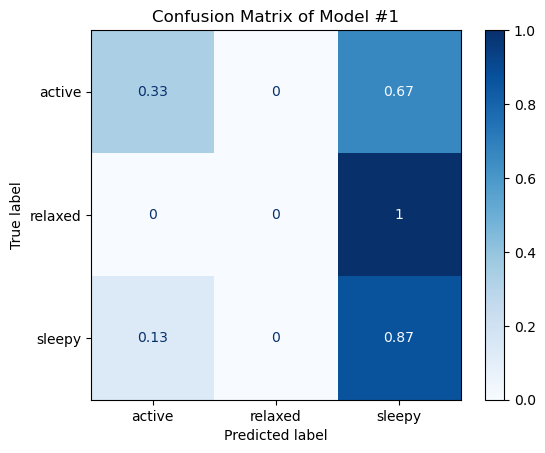

In [22]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Model #1")
plt.grid(False)
plt.show()

Prepare and Train Model using SMOTE

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
def get_class_distribution(y):
    print(f"{'Class':<9} {'Sum'}")
    for i in range(len(labels)):
        n = np.count_nonzero(y == i)
        print(f"{labels[i]:<9} {n}")
    print("\nTotal:", len(y))
    
get_class_distribution(y)

Class     Sum
active    26
relaxed   11
sleepy    51

Total: 88


In [67]:
def run_sampler(X_data, oversampling_dict):
    oversampler = SMOTE(sampling_strategy=oversampling_dict, random_state=0)

    X_sample, y_sample = oversampler.fit_resample(X_data, y)
    return X_sample, y_sample

X_sample, y_sample = run_sampler(X, {0:45, 1:49, 2:51})
get_class_distribution(y_sample)

Class     Sum
active    45
relaxed   49
sleepy    51

Total: 145


In [21]:
le = LabelEncoder()
X_sample['Gender'] = le.fit_transform(X_sample['Gender'])
print(X_sample)

y_sample = le.fit_transform(y_sample)
print(y_sample)

     Gender  Age         alpha          beta         gamma         theta  \
0         0   57  4.487562e-09  8.151255e-09  3.232289e-08  1.807745e-08   
1         0   78  6.760981e-09  9.113942e-08  4.419606e-07  1.837055e-08   
2         1   70  6.869602e-09  3.701308e-09  1.263973e-08  1.718834e-08   
3         0   67  5.240635e-09  1.678292e-07  4.503802e-07  3.691043e-08   
4         1   70  1.503867e-07  1.952402e-07  7.413559e-07  3.448303e-07   
..      ...  ...           ...           ...           ...           ...   
140       0   74  9.714684e-09  1.963683e-08  2.827320e-08  5.541626e-08   
141       0   56  5.533581e-06  7.381361e-06  9.479233e-06  1.613634e-05   
142       0   64  1.267616e-05  3.485283e-05  3.194511e-05  3.794349e-05   
143       1   71  2.467807e-06  5.127778e-06  4.205567e-06  5.977408e-06   
144       0   57  8.871463e-06  1.183781e-05  1.520020e-05  2.588401e-05   

            delta  
0    1.829355e-07  
1    1.923307e-07  
2    1.345857e-07  
3    2.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.25, random_state=0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print("X Train Shape:", X_train.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (108, 7)
X Test Shape: (37, 7)


In [28]:
svm = SVC(kernel='poly', C=1.0, decision_function_shape='ovr', gamma=1.0, random_state=0)
svm.fit(X_train, y_train)

SVC(gamma=1.0, kernel='poly', random_state=0)

In [29]:
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.60      0.75      0.67        12
           2       0.80      0.50      0.62        16

    accuracy                           0.65        37
   macro avg       0.66      0.68      0.65        37
weighted avg       0.68      0.65      0.64        37



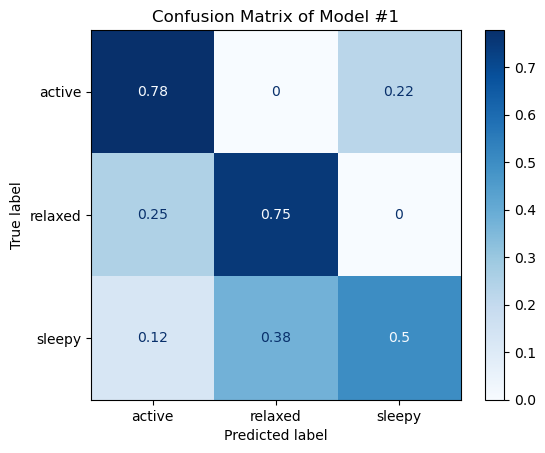

In [30]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Model #1")
plt.grid(False)
plt.show()

Using Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.25, random_state=0)

In [120]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=50, 
                                 cv=5)

# Fit the random search object to the data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021078F7FC40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021077BB89A0>})

In [121]:
best_rf = random_search.best_estimator_

print('Best hyperparameters:',  random_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 323}


In [122]:
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.75      0.75      0.75        12
           2       0.77      0.62      0.69        16

    accuracy                           0.76        37
   macro avg       0.76      0.79      0.77        37
weighted avg       0.76      0.76      0.75        37



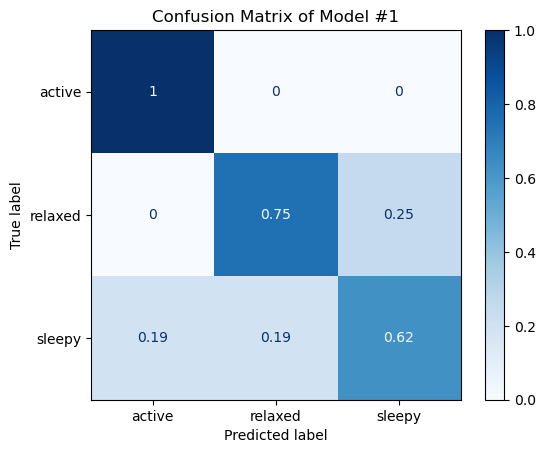

In [123]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Model #1")
plt.grid(False)
plt.show()

This new model is the best so far but is unable to learn a very clear distinction between Relaxed and Sleepy. But it is able to learn a very clear distinction for Active

Use Extreme Gradient Boosting (Preparation into Pipeline)

In [68]:
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.25, random_state=0)

In [76]:
class_weights = {0:0.8, 1:1.5, 2:12}
sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

xgb_model = XGBClassifier(colsample_bytree=0.8, gamma=1.1, learning_rate=0.05, max_depth=200, min_child_weight=0.1, n_estimators=500, num_class=len(labels), objective='multi:softprob')
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      active       0.80      0.89      0.84         9
     relaxed       0.91      0.83      0.87        12
      sleepy       0.81      0.81      0.81        16

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



In [23]:
# cm = confusion_matrix(y_test, y_pred, normalize='true')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix of Model #4")
# plt.grid(False)
# plt.show()

Build Pipeline for Model Deployment

In [46]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [51]:
# categorical_processor = Pipeline(steps=[('label_encoder', LabelEncoder(), ['Gender']),
#                                         ('ordinal_encoder', OrdinalEncoder(categories=[labels]), ['active_level'])])

preprocessor_transformer = ColumnTransformer(transformers=[("cat_x", OrdinalEncoder(categories=[['F', 'M']]), ['Gender']),
                                                           ("num", StandardScaler(), ['Gender', 'Age', 'alpha', 'beta', 'gamma', 'theta', 'delta'])])

pipe = Pipeline(steps=[('preprocessor', preprocessor_transformer),
                       ('model', xgb_model)])

set_config(display="diagram")

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_x',
                                                  OrdinalEncoder(categories=[['F',
                                                                              'M']]),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Gender', 'Age', 'alpha',
                                                   'beta', 'gamma', 'theta',
                                                   'delta'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.7, device=No...
                               feature_types=None, gamma=1.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=200, max_leaves=None,
                               min_child_weight=0.1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [52]:
pipe.fit(X_train, y_train, **{'model__sample_weight': sample_weights})

ValueError: could not convert string to float: 'F'

In [28]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      active       0.80      0.89      0.84         9
     relaxed       0.91      0.83      0.87        12
      sleepy       0.81      0.81      0.81        16

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



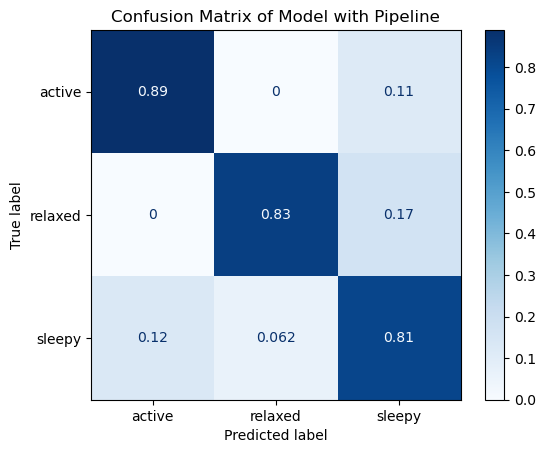

In [29]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Model with Pipeline")
plt.grid(False)
plt.show()

Save Model and Pipeline

In [30]:
import pickle

pickle.dump(xgb_model, open('./models/active_level_classification_model.pkl', 'wb'))
# pickle.dump(pipe, open('./models/active_level_pipeline.pkl', 'wb'))

Labelling of Individual Music By Activeness Level

In [628]:
patients_sampled = X_sample
patients_sampled['active_level'] = y_sample
patients_sampled['music'] = ''

patients_sampled

,Gender,Age,alpha,beta,gamma,theta,delta,active_level,music
0,0,57,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,2,
1,0,78,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,0,
2,1,70,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,1,
3,0,67,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,2,
4,1,70,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,2,
...,...,...,...,...,...,...,...,...,...
140,0,74,9.714684e-09,1.963683e-08,2.827320e-08,5.541626e-08,3.169674e-07,1,
141,0,56,5.533581e-06,7.381361e-06,9.479233e-06,1.613634e-05,9.137659e-05,1,
142,0,64,1.267616e-05,3.485283e-05,3.194511e-05,3.794349e-05,3.241100e-05,1,
143,1,71,2.467807e-06,5.127778e-06,4.205567e-06,5.977408e-06,1.391941e-05,1,


In [632]:
import glob
from random import randint
from sklearn.preprocessing import OrdinalEncoder

In [630]:
# music_dict = {}

# for level in labels:
#     music_dict[level] = [os.path.basename(x).replace('.mp3', '') for x in glob.glob(f'./sample_music/{level}/*.mp3')]

# music_dict

{'active': ['abba_dancing_queen',
  'circle_of_life',
  'survivor_eye_of_the_tiger'],
 'relaxed': ['airstream_electra',
  'dj_shah_mellomaniac',
  'marcino_union_weightless'],
 'sleepy': ['here_comes_the_sun', 'the_climb', 'you_raise_me_up']}

In [631]:
# for i, level in enumerate(labels):
#     for id, row in patients_sampled.iterrows():
#         if row['active_level'] == i:
#             patients_sampled.loc[id, 'music'] = music_dict[level][randint(0, len(music_dict[level]) - 1)]

# patients_sampled

,Gender,Age,alpha,beta,gamma,theta,delta,active_level,music
0,0,57,4.487562e-09,8.151255e-09,3.232289e-08,1.807745e-08,1.829355e-07,2,the_climb
1,0,78,6.760981e-09,9.113942e-08,4.419606e-07,1.837055e-08,1.923307e-07,0,circle_of_life
2,1,70,6.869602e-09,3.701308e-09,1.263973e-08,1.718834e-08,1.345857e-07,1,airstream_electra
3,0,67,5.240635e-09,1.678292e-07,4.503802e-07,3.691043e-08,2.171671e-06,2,you_raise_me_up
4,1,70,1.503867e-07,1.952402e-07,7.413559e-07,3.448303e-07,9.152342e-07,2,the_climb
...,...,...,...,...,...,...,...,...,...
140,0,74,9.714684e-09,1.963683e-08,2.827320e-08,5.541626e-08,3.169674e-07,1,airstream_electra
141,0,56,5.533581e-06,7.381361e-06,9.479233e-06,1.613634e-05,9.137659e-05,1,airstream_electra
142,0,64,1.267616e-05,3.485283e-05,3.194511e-05,3.794349e-05,3.241100e-05,1,dj_shah_mellomaniac
143,1,71,2.467807e-06,5.127778e-06,4.205567e-06,5.977408e-06,1.391941e-05,1,dj_shah_mellomaniac


In [231]:
# patients_sampled.to_csv('./own_datasets/music_labelled.csv', index=None)

In [633]:
patients_sampled = pd.read_csv('./own_datasets/music_labelled.csv')

In [634]:
music_labels = [music for x in music_dict.values() for music in x]

music_labels

['abba_dancing_queen',
 'circle_of_life',
 'survivor_eye_of_the_tiger',
 'airstream_electra',
 'dj_shah_mellomaniac',
 'marcino_union_weightless',
 'here_comes_the_sun',
 'the_climb',
 'you_raise_me_up']

In [635]:
X_music = patients_sampled.drop(['music'], axis=1)
y_music = patients_sampled['music']

def get_music_distribution(y):
    print(f"{'Class':<25} {'Sum'}")
    for music in music_labels:
        n = np.count_nonzero(y == music)
        print(f"{music:<25} {n}")
    print("\nTotal:", len(y))
get_music_distribution(y_music)

Class                     Sum
abba_dancing_queen        17
circle_of_life            13
survivor_eye_of_the_tiger 15
airstream_electra         13
dj_shah_mellomaniac       17
marcino_union_weightless  19
here_comes_the_sun        14
the_climb                 23
you_raise_me_up           14

Total: 145


In [636]:
X_music_level = {}
y_music_level = {}

for i, level in enumerate(labels):
    df_music_level = patients_sampled[patients_sampled['active_level'] == i]
    oe = OrdinalEncoder(categories=[music_labels])
    df_music_level['music'] = oe.fit_transform(df_music_level[['music']])

    X_music_level[level] = df_music_level.drop(['music'], axis=1)
    y_music_level[level] = df_music_level['music']

    print(f"{level} - {df_music_level.shape[0]}")

active - 45
relaxed - 49
sleepy - 51


C:\Users\couts\AppData\Local\Temp\ipykernel_2956\3518275363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_level['music'] = oe.fit_transform(df_music_level[['music']])
C:\Users\couts\AppData\Local\Temp\ipykernel_2956\3518275363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music_level['music'] = oe.fit_transform(df_music_level[['music']])
C:\Users\couts\AppData\Local\Temp\ipykernel_2956\3518275363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
# def run_sampler(X_data, oversampling_dict):
#     oversampler = SMOTE(sampling_strategy=oversampling_dict, random_state=0)

#     X_sample, y_sample = oversampler.fit_resample(X_data, y)
#     return X_sample, y_sample

# X_sample_music, y_sample_music = run_sampler(X_music, )
# get_class_distribution(y_sample_music)

In [637]:
def run_music_classifier(model, level, scale=False):
    X_train, X_test, y_train, y_test = train_test_split(X_music_level[level], y_music_level[level], test_size=0.25, random_state=0)

    if scale:
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)

    rf = RandomForestClassifier()

    # Use random search to find the best hyperparameters
    random_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=100, 
                                    cv=5)
    random_search.fit(X_train, y_train)
    best_rf = random_search.best_estimator_

    y_pred = best_rf.predict(X_test)
    print(level + ":")
    print(classification_report(y_test, y_pred, target_names=music_dict[level]))

In [265]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}

# # Create a random forest classifier
# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# random_search = RandomizedSearchCV(rf, 
#                                  param_distributions = param_dist, 
#                                  n_iter=100, 
#                                  cv=5)

# # Fit the random search object to the data
# random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000193D4CFBAC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000193D80A2260>})

In [267]:
# best_rf = random_search.best_estimator_

# print('Best hyperparameters:',  random_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 315}


In [271]:
# y_pred = best_rf.predict(X_test)

# print(classification_report(y_test, y_pred, target_names=music_labels))

                           precision    recall  f1-score   support

       abba_dancing_queen       0.50      0.33      0.40         6
           circle_of_life       0.25      0.50      0.33         2
survivor_eye_of_the_tiger       0.00      0.00      0.00         1
        airstream_electra       0.00      0.00      0.00         2
      dj_shah_mellomaniac       0.33      0.17      0.22         6
 marcino_union_weightless       0.14      0.25      0.18         4
       here_comes_the_sun       0.00      0.00      0.00         1
                the_climb       0.50      0.27      0.35        11
          you_raise_me_up       0.33      0.25      0.29         4

                 accuracy                           0.24        37
                macro avg       0.23      0.20      0.20        37
             weighted avg       0.35      0.24      0.27        37



In [638]:
# svm = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr', gamma=0.1, random_state=0)

# run_music_classifier(svm, labels[0], False)

for level in labels:
    run_music_classifier(None, level, False)

active:
                           precision    recall  f1-score   support

       abba_dancing_queen       0.29      0.67      0.40         3
           circle_of_life       0.40      0.67      0.50         3
survivor_eye_of_the_tiger       0.00      0.00      0.00         6

                 accuracy                           0.33        12
                macro avg       0.23      0.44      0.30        12
             weighted avg       0.17      0.33      0.23        12



c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

relaxed:
                          precision    recall  f1-score   support

       airstream_electra       0.25      0.50      0.33         4
     dj_shah_mellomaniac       0.00      0.00      0.00         3
marcino_union_weightless       0.75      0.50      0.60         6

                accuracy                           0.38        13
               macro avg       0.33      0.33      0.31        13
            weighted avg       0.42      0.38      0.38        13

sleepy:
                    precision    recall  f1-score   support

here_comes_the_sun       0.00      0.00      0.00         5
         the_climb       0.23      1.00      0.38         3
   you_raise_me_up       0.00      0.00      0.00         5

          accuracy                           0.23        13
         macro avg       0.08      0.33      0.12        13
      weighted avg       0.05      0.23      0.09        13



c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\couts\anaconda3\envs\aurawave-data\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)